# Reto de Predicción de Salarios

In [79]:
!pip install Unidecode

!python -m spacy download es_core_news_md

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 29.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [80]:
# Estándar
from itertools import combinations

# Científicas
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter / IPython
from IPython.display import display, Math

import pandas as pd
import ast
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pandas as pd
import ast
import re
import numpy as np
import unicodedata
import re
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# from statsmodels.tools.eval_measures import rmse
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocesamiento y EDA

In [81]:
df = pd.read_csv('data/dataset_oficial.csv')

In [82]:
df = df.rename(columns={'unnamed': 'last_register'})
df = df.rename(columns={'unnamed_2': 'years_experience'})

In [83]:
# df = df.drop('city', axis=1)

In [84]:
df['final_salary'].isnull().sum()

np.int64(7572)

In [85]:
print("Porcentaje de nulos de final_salary:")
print(df['final_salary'].isnull().mean() * 100)

Porcentaje de nulos de final_salary:
54.28735302552338


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              13948 non-null  object 
 1   company           13731 non-null  object 
 2   title             13937 non-null  object 
 3   position          13948 non-null  object 
 4   province          13948 non-null  object 
 5   city              13138 non-null  object 
 6   date_of_birth     13948 non-null  object 
 7   last_register     13948 non-null  object 
 8   years_experience  13948 non-null  float64
 9   skills            5344 non-null   object 
 10  final_salary      6376 non-null   float64
dtypes: float64(2), object(9)
memory usage: 1.2+ MB


In [87]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024-09-26,3.966667,NaN,18000.0
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010-11-21,23.227778,NaN,21000.0
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018-09-11,21.902778,NaN,42000.0
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022-11-08,11.580556,NaN,18000.0
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013-06-17,15.811111,NaN,36000.0


### Último registro

In [88]:
df['last_register'] = pd.to_datetime(df['last_register'], errors='coerce').dt.year

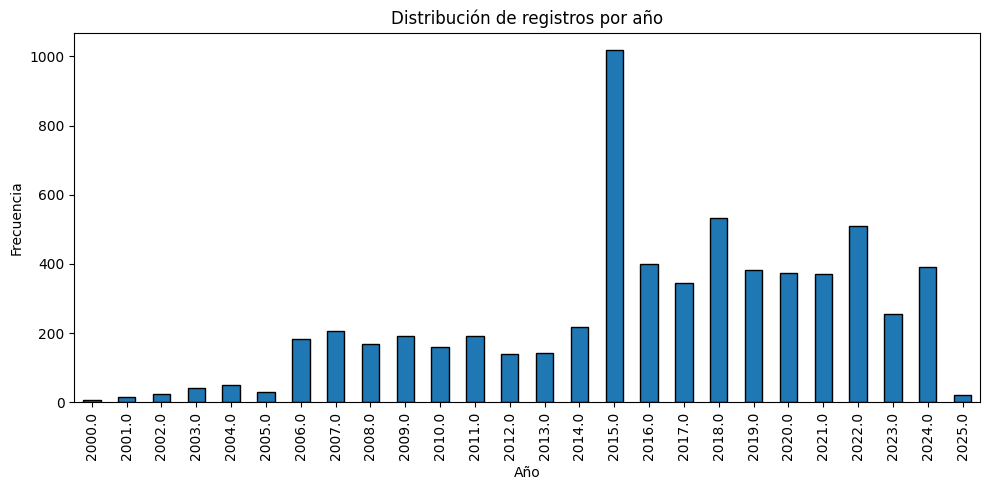

In [89]:
plt.figure(figsize=(10, 5))
df['last_register'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribución de registros por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

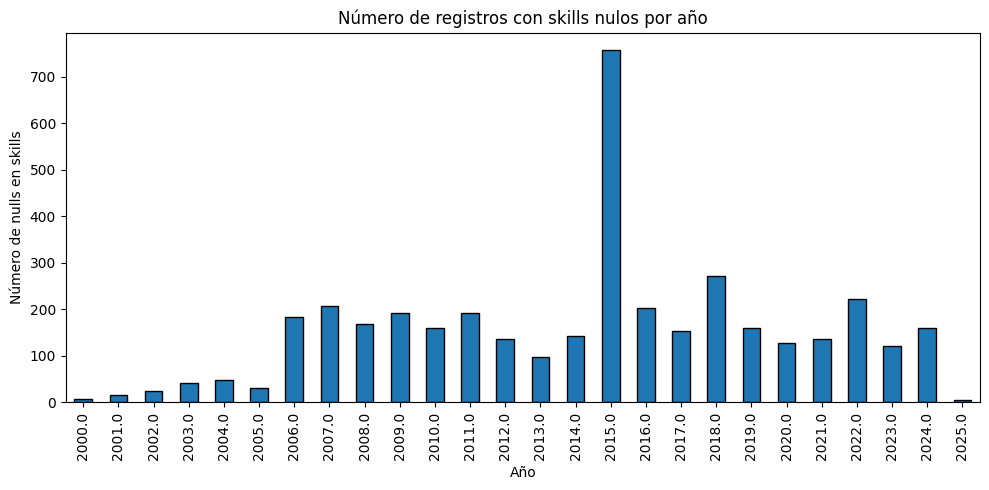

In [90]:
# Filtrar solo las filas donde skills es null
missing_skills_per_year = df[df['skills'].isnull()]['last_register'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
missing_skills_per_year.plot(kind='bar', edgecolor='black')
plt.title('Número de registros con skills nulos por año')
plt.xlabel('Año')
plt.ylabel('Número de nulls en skills')
plt.tight_layout()
plt.show()

In [91]:
df['skills'].isnull().sum()

np.int64(8604)

<Axes: xlabel='last_register', ylabel='years_experience'>

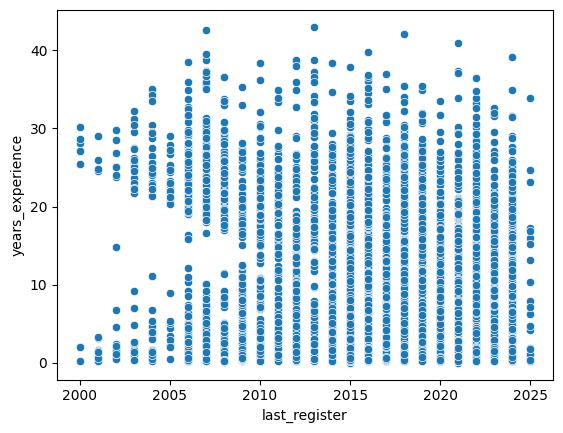

In [92]:
sns.scatterplot(x='last_register', y='years_experience', data=df)

In [93]:
bins = [1999, 2005, 2010, 2015, 2020, 2025]
labels = ['2000–2005', '2006–2010', '2011–2015', '2016–2020', '2021–2025']
df['register_period'] = pd.cut(df['last_register'], bins=bins, labels=labels)

/var/folders/3h/mn_gblgs6jzchz5_k2hy9rdw0000gn/T/ipykernel_10971/721067614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('register_period')['years_experience'].mean().plot(kind='bar', title='Experiencia media por periodo de registro')


<Axes: title={'center': 'Experiencia media por periodo de registro'}, xlabel='register_period'>

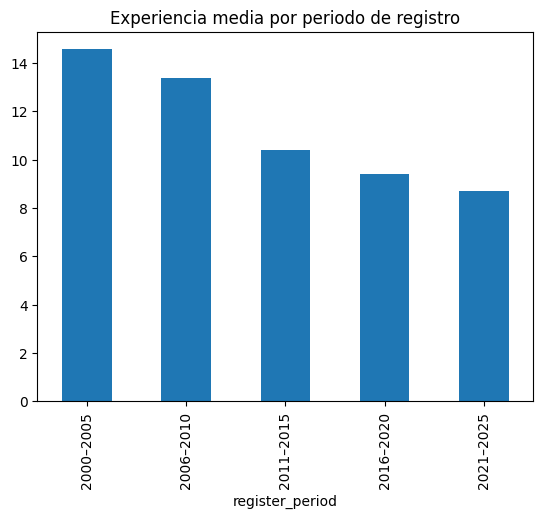

In [94]:
df.groupby('register_period')['years_experience'].mean().plot(kind='bar', title='Experiencia media por periodo de registro')

Text(0.5, 1.0, 'Distribución de años de experiencia por cohorte de registro')

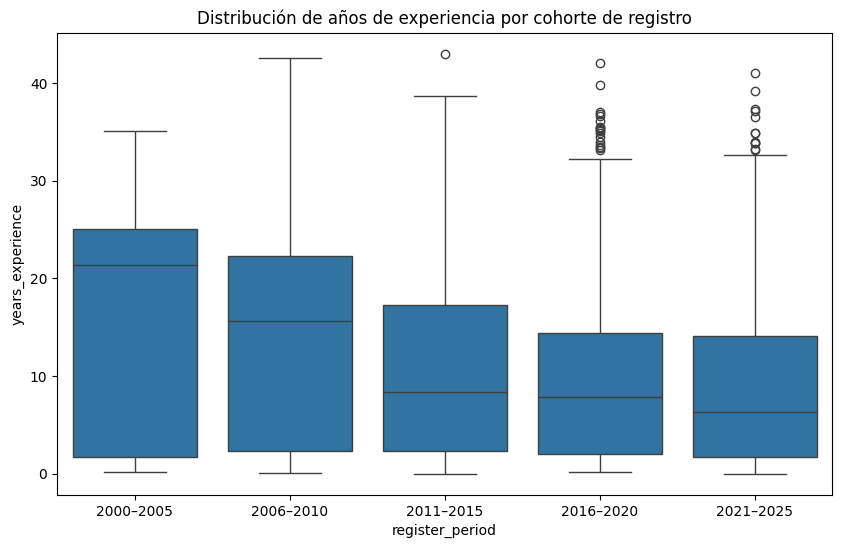

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='register_period', y='years_experience', data=df)
plt.title('Distribución de años de experiencia por cohorte de registro')

##### Conclusiones

1. **Disminución de la experiencia media con el tiempo**

* La **experiencia media** en los registros ha disminuido desde 2000–2005 (\~14 años) hasta 2021–2025 (\~9 años).
* Esto es visible tanto en el histograma de barras como en el boxplot.

2. **Distribución más compacta y centrada en registros recientes**

* En el boxplot:

  * Las cohortes más recientes tienen una **distribución más estrecha y centrada en valores bajos** de experiencia.
  * Las cohortes más antiguas incluyen más outliers y perfiles con mucha más experiencia.

3. **Creciente inclusión de perfiles juniors**

* Desde 2011 en adelante, aparecen cada vez más perfiles con 0–5 años de experiencia.
* Esto sugiere que el sistema/dataset empezó a incluir perfiles más diversos, no solo sénior.



### Comunidades Autónomas

In [96]:
df['province'].unique()

array(['Madrid', 'Islas Baleares', 'Sevilla', 'Valencia', 'Vizcaya',
       'Alicante', 'León', 'Cádiz', 'Granada', 'Guipúzcoa', 'Ciudad Real',
       'Guadalajara', 'Córdoba', 'Valladolid', 'Pontevedra', 'Navarra',
       'Ourense', 'Barcelona', 'Zaragoza', 'Palencia', 'A Coruña',
       'Álava', 'Asturias', 'Santa Cruz de Tenerife', 'Burgos',
       'Salamanca', 'Murcia', 'Cantabria', 'Las Palmas', 'Segovia',
       'Soria', 'Málaga', 'Tarragona', 'Girona', 'Toledo', 'Lleida',
       'Jaén', 'Badajoz', 'Huesca', 'Albacete', 'Huelva', 'Castellón',
       'Ávila', 'La Rioja', 'Zamora', 'Almería', 'Cáceres', 'Cuenca',
       'Teruel', 'Lugo', 'Melilla'], dtype=object)

In [97]:
prov_to_ccaa = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Asturias': 'Principado de Asturias',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellón': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Islas Baleares': 'Islas Baleares',
    'Jaén': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón'
}

In [98]:
df['comunidad'] = df['province'].map(prov_to_ccaa)

In [ ]:
# df.groupby('comunidad')['final_salary'].mean().sort_values(ascending=False)

comunidad
País Vasco                27518.041237
Comunidad de Madrid       27511.821975
Cataluña                  25760.563380
La Rioja                  24608.695652
Cantabria                 24339.622642
Islas Baleares            24311.111111
Melilla                   24000.000000
Navarra                   23333.333333
Comunidad Valenciana      22863.325740
Canarias                  22752.941176
Castilla y León           22445.993031
Principado de Asturias    21892.857143
Castilla-La Mancha        21842.364532
Aragón                    21835.164835
Andalucía                 20864.314790
Región de Murcia          20528.735632
Galicia                   19661.971831
Extremadura               18578.125000
Name: final_salary, dtype: float64

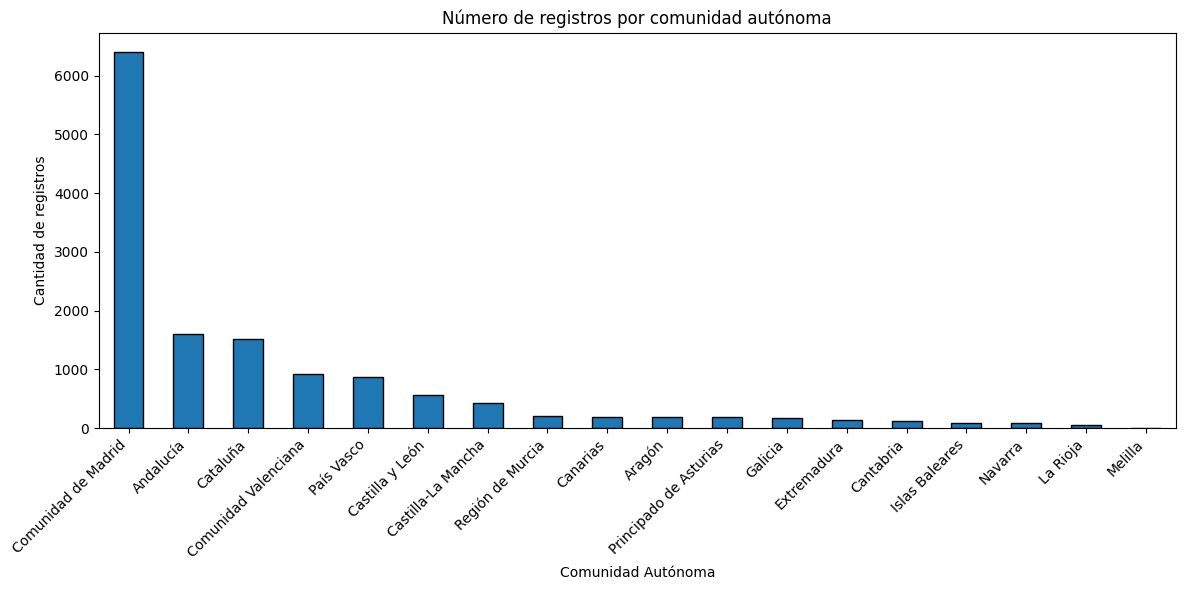

In [100]:
# Agrupación y conteo
counts = df['comunidad'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', edgecolor='black')
plt.title('Número de registros por comunidad autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Conclusiones: Número de registros por comunidad autónoma

- **La Comunidad de Madrid** concentra una proporción abrumadora de los registros, representando cerca de la mitad del dataset.
- Otras comunidades como **Andalucía** y **Cataluña** tienen también una presencia significativa, aunque muy por detrás de Madrid.
- La mayoría de comunidades autónomas están infrarrepresentadas, lo cual introduce un **sesgo territorial** en los datos.
- Esta distribución desigual puede afectar los análisis y modelos si no se controla adecuadamente.

> **Implicación**: Si se desea hacer inferencias generalizables o justas entre comunidades, se recomienda considerar muestreo estratificado, ponderación, o segmentación regional en el análisis.

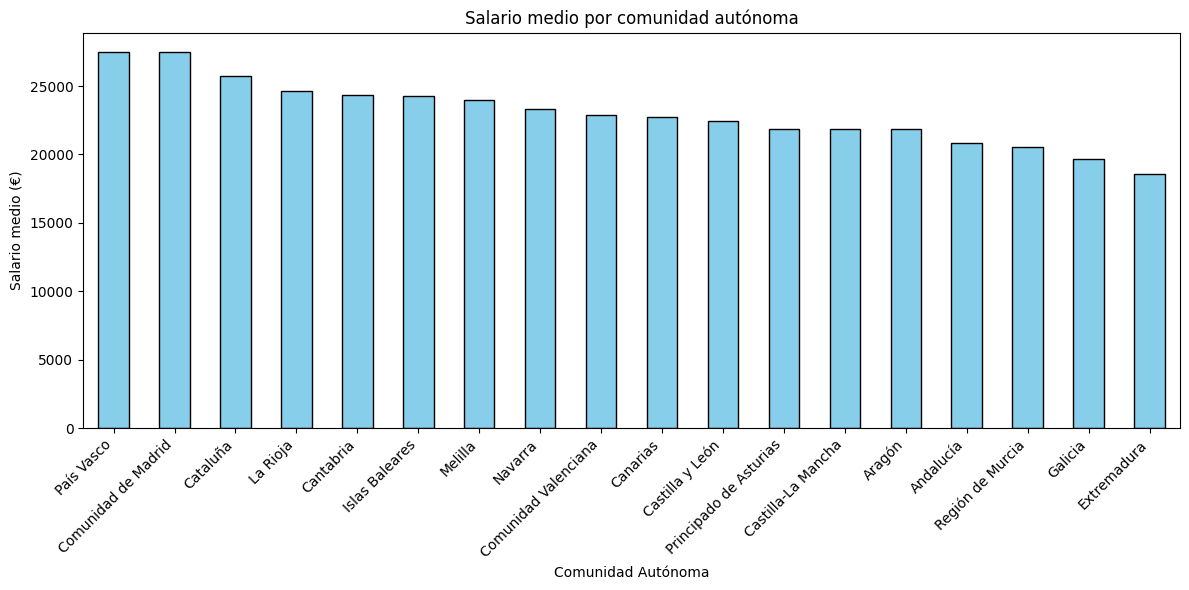

In [101]:
avg_salary = df.groupby('comunidad')['final_salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_salary.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Salario medio por comunidad autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Salario medio (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Conclusiones: Salario medio por comunidad autónoma

- Las comunidades con mayores salarios medios son el **País Vasco**, la **Comunidad de Madrid** y **Cataluña**, en línea con los datos económicos reales de España.
- Las comunidades con salarios más bajos incluyen **Extremadura**, **Galicia** y la **Región de Murcia**.
- Se observa una clara **brecha territorial en el salario**, lo cual sugiere que la localización geográfica es un **predictor relevante del salario**.

> **Implicación**: La comunidad autónoma debería ser tenida en cuenta como variable explicativa en cualquier modelo predictivo relacionado con `final_salary`.


#### One-hot Encoding

In [102]:
# Umbral mínimo para considerar comunidad significativa
umbral = 900

# Obtener conteo de comunidades
comunidad_counts = df['comunidad'].value_counts()

# Crear nueva columna con agrupación
df['comunidad'] = df['comunidad'].apply(
    lambda x: x if pd.notnull(x) and comunidad_counts.get(x, 0) >= umbral else 'Otros'
)


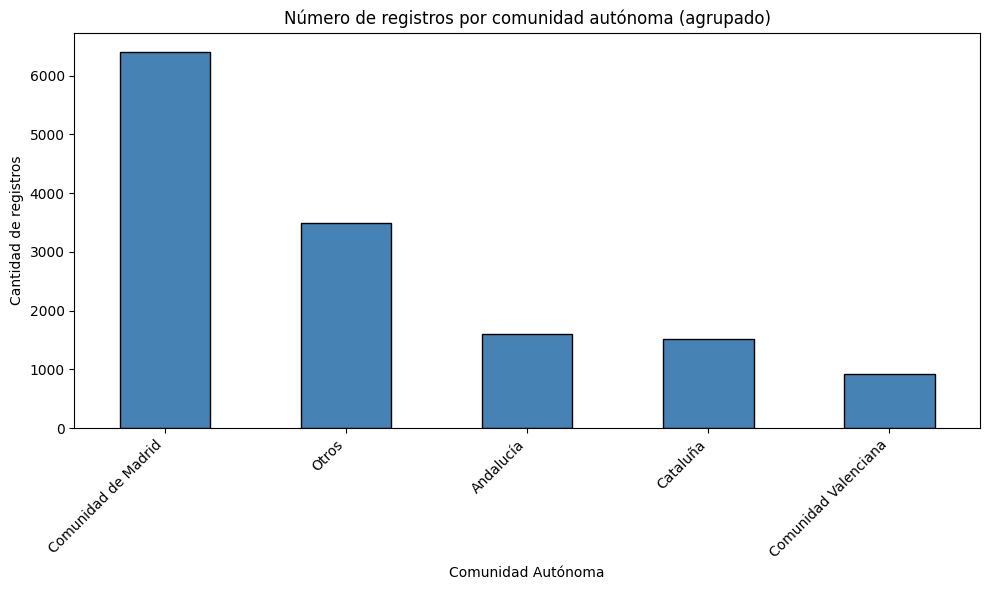

In [103]:
# Nuevo conteo
counts_agrupados = df['comunidad'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
counts_agrupados.plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Número de registros por comunidad autónoma (agrupado)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [104]:
def limpiar_columna(col):
    if col.startswith('comunidad_'):
        nombre = col.replace('comunidad_', '')
        # Quitar tildes
        nombre = unicodedata.normalize('NFKD', nombre).encode('ascii', 'ignore').decode('utf-8')
        # Reemplazar espacios y guiones por guiones bajos, bajar todo a minúsculas
        nombre = re.sub(r'[^a-zA-Z0-9]', '_', nombre).lower()
        # Evitar múltiples guiones bajos seguidos
        nombre = re.sub('_+', '_', nombre).strip('_')
        return f"comunidad_{nombre}"
    return col

In [105]:
df = pd.get_dummies(df, columns=['comunidad'], prefix='comunidad', drop_first=False)

# Aplicar a nombres de columnas
df.columns = [limpiar_columna(col) for col in df.columns]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   uuid                            13948 non-null  object  
 1   company                         13731 non-null  object  
 2   title                           13937 non-null  object  
 3   position                        13948 non-null  object  
 4   province                        13948 non-null  object  
 5   city                            13138 non-null  object  
 6   date_of_birth                   13948 non-null  object  
 7   last_register                   6376 non-null   float64 
 8   years_experience                13948 non-null  float64 
 9   skills                          5344 non-null   object  
 10  final_salary                    6376 non-null   float64 
 11  register_period                 6376 non-null   category
 12  comunidad_andaluci

### Position y Title

In [107]:
# 2. Preparar df_cargos para processamento
df_cargos = df[['title', 'position', 'final_salary']].copy()
# df_cargos = df_cargos[df_cargos['position'].notna()]
df_cargos['title_lista'] = df_cargos['title'].apply(
    lambda x: [t.strip() for t in x.split('|')] if isinstance(x, str) else []
)

# 3. NLP para limpar texto e vetorização
import spacy, unidecode, re
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nlp = spacy.load("es_core_news_md")

def preprocessar_nlp(texto):
    texto = unidecode.unidecode(texto.lower())
    texto = re.sub(r'[\-_/|.,;:]', ' ', texto)
    texto = re.sub(r'[^a-z\s]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    doc = nlp(texto)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return ' '.join(tokens)

df_cargos['trajetoria_texto'] = df_cargos['title_lista'].apply(
    lambda lista: preprocessar_nlp(' '.join(lista)) if isinstance(lista, list) else ''
)
df_cargos['position_texto'] = df_cargos['position'].astype(str).apply(preprocessar_nlp)

# 4. Vetorização
df_cargos['vector_trajetoria'] = df_cargos['trajetoria_texto'].apply(lambda txt: nlp(txt).vector)
df_cargos['vector_position'] = df_cargos['position_texto'].apply(lambda txt: nlp(txt).vector)

# 5. Perfil médio por posição
perfis_referencia = (
    df_cargos[df_cargos['trajetoria_texto'] != '']
    .groupby('position')['vector_trajetoria']
    .apply(lambda vetores: np.mean(np.stack(vetores), axis=0))
    .to_dict()
)

# 6. Similaridade com a média
def comparar_com_referencia(row):
    pos = row['position']
    if pos in perfis_referencia:
        media = perfis_referencia[pos]
        return cosine_similarity([row['vector_trajetoria']], [media])[0][0]
    return np.nan

df_cargos['similaridade_com_trajetoria_típica'] = df_cargos.apply(comparar_com_referencia, axis=1)

# 7. Classificação
def classificar_similaridade(sim):
    if pd.isna(sim):
        return 'sem_referencia'
    elif sim >= 0.2:
        return 'coerente'
    return 'suspeito'

df_cargos['avaliacao_coerencia'] = df_cargos['similaridade_com_trajetoria_típica'].apply(classificar_similaridade)

# 8. Filtrar os índices dos suspeitos
indices_suspeitos = df_cargos[df_cargos['avaliacao_coerencia'] == 'suspeito'].index

# 9. Remover os suspeitos do df principal
df.drop(index=indices_suspeitos, inplace=True)
df.reset_index(drop=True, inplace=True)

# 10. Adicionar a coluna 'position_texto' ao df original filtrado
df['position_texto'] = df['position'].astype(str).apply(preprocessar_nlp)

# ✅ Agora df está pronto, limpo e com a coluna processada!


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cargos['similaridade_com_trajetoria_típica'].dropna(), bins=30, kde=True, color='royalblue')
plt.title("Distribución de similitudes entre trayectoria y posición actual")
plt.xlabel("Similitud coseno")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


KeyError: 'similaridade_com_trajetoria_típica'

<Figure size 1000x600 with 0 Axes>

In [ ]:
df

,uuid,company,title,position,province,date_of_birth,last_register,years_experience,skills,final_salary,register_period,comunidad_andalucia,comunidad_cataluna,comunidad_comunidad_valenciana,comunidad_comunidad_de_madrid,comunidad_otros,position_texto
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,1974-08-28T00:00:00.000Z,2024.0,3.966667,NaN,18000.0,2021–2025,False,False,False,True,False,tecnico soporte
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,1974-03-24T00:00:00.000Z,2010.0,23.227778,NaN,21000.0,2006–2010,False,False,False,False,True,consultor erp
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,1966-10-08T00:00:00.000Z,2018.0,21.902778,NaN,42000.0,2016–2020,False,False,False,True,False,jefe proyecto
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,1968-03-23T00:00:00.000Z,2022.0,11.580556,NaN,18000.0,2021–2025,True,False,False,False,False,jefe informatica
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,1969-10-22T00:00:00.000Z,2013.0,15.811111,NaN,36000.0,2011–2015,False,False,False,True,False,administrador base dato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13707,965378c5-ffd8-44f7-a9fa-87c629e562c7,Freelance | FHIOS Smart Knowledge | W3 IT Solu...,Full stack web developer (Freelance) | Web dev...,Programador Angular,Girona,1988-04-25T00:00:00.000Z,NaN,4.225000,"[""Angular Material"",""Git"",""HTML"",""Kanban"",""OAu...",NaN,NaN,False,True,False,False,False,programador angular
13708,fe2bdc07-3471-47d9-be72-0888127eb608,CINFO Contenidos Informativos S.L. | INVBIT Di...,Desarrollador Front-End | Desarrollador Web | ...,Programador PHP,A Coruña,1997-08-12T00:00:00.000Z,NaN,1.169444,"[""MySQL"",""HTML"",""Apache Maven"",""Bash"",""CSS"",""M...",NaN,NaN,False,False,False,False,True,programador php
13709,8b0ae6b8-f8ab-49da-b318-640ca8db080d,Mostrarium - Beecubu | KINNIK sport & JUNO | M...,Project Manager | Project Manager & communicat...,Jefe de Proyecto,Guipúzcoa,1992-05-11T00:00:00.000Z,NaN,4.897222,"[""Marketing"",""Sales"",""Support""]",NaN,NaN,False,False,False,False,True,jefe proyecto
13710,4ad83a2c-f7cb-48b4-ab73-0973fa883be0,SDG Group | Bosonit,SAP Analyst | Data Science & BI Associate Cons...,Consultor SAP,La Rioja,1999-06-13T00:00:00.000Z,NaN,1.263889,"[""R"",""SPSS"",""Power BI"",""Machine Learning"",""SAP...",NaN,NaN,False,False,False,False,True,consultor sap


In [ ]:
df['position_texto'].unique()

array(['tecnico soporte', 'consultor erp', 'jefe proyecto',
       'jefe informatica', 'administrador base dato',
       'responsable desarrollo', 'consultor senior informatica',
       'gestor especialista producto', 'informatico',
       'director informatica', 'tecnico hardware',
       'consultor senior business', 'jefe proyecto sap',
       'analista programador', 'jefe proceso dato',
       'consultor senior tecnologia informacion', 'programador',
       'community manager', 'jefe soporte', 'operador explotacion',
       'administrador sistema', 'analista funcional',
       'director proyecto informatico', 'consultor informatica',
       'tecnico calidad prueba', 'maquetador web', 'tecnico seguridad',
       'consultor business', 'director area tecnico', 'jefe sistema',
       'webmaster', 'consultor senior business intelligence',
       'formador tecnico', 'operador sistema red', 'tecnico red',
       'analista organico', 'responsable diseno',
       'consultor tecnologia inform

In [ ]:
import pandas as pd
import re
import unicodedata

def limpiar_y_tokenizar(texto):
    # Pasar a minúsculas
    texto = texto.lower()
    # Quitar tildes
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
    # Eliminar caracteres no alfabéticos
    texto = re.sub(r'[^a-z\s]', ' ', texto)
    # Reducir múltiples espacios a uno
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Dividir en lista de palabras
    return texto.split()

# Aplicar limpieza
df['position_palabras'] = df['position_texto'].apply(limpiar_y_tokenizar)

In [ ]:
df[['position_texto', 'position_palabras']].head()

,position_texto,position_palabras
0,tecnico soporte,"[tecnico, soporte]"
1,consultor erp,"[consultor, erp]"
2,jefe proyecto,"[jefe, proyecto]"
3,jefe informatica,"[jefe, informatica]"
4,administrador base dato,"[administrador, base, dato]"


In [ ]:
# Forzar a booleano si es necesario
cols_comunidad = [col for col in df.columns if col.startswith('comunidad_')]
df[cols_comunidad] = df[cols_comunidad].astype(bool)

# Ahora extraer la comunidad activa
df['comunidad_grupo'] = df[cols_comunidad].idxmax(axis=1).str.replace('comunidad_', '', regex=False)

In [ ]:
df_exploded = df.explode('position_palabras')

In [ ]:
conteo_palabras = (
    df_exploded
    .groupby(['comunidad_grupo', 'position_palabras'])
    .size()
    .reset_index(name='frecuencia')
)

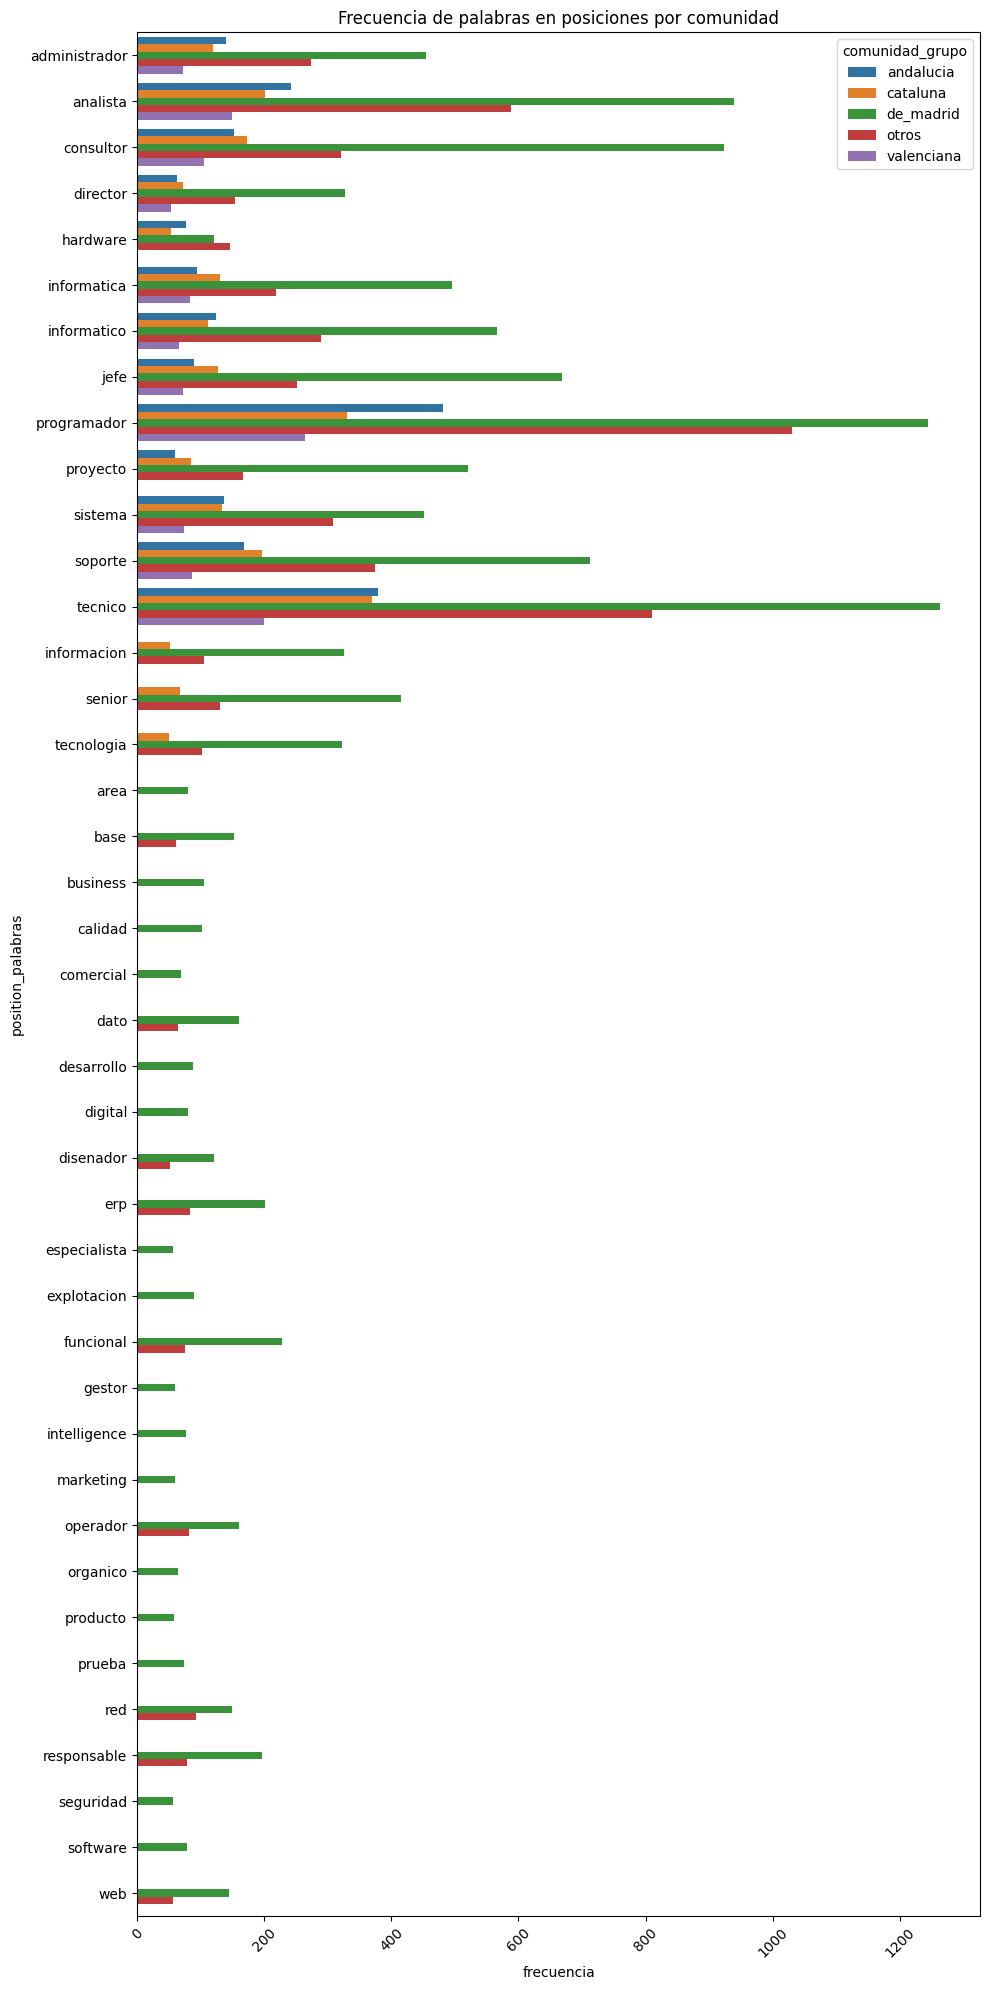

In [ ]:
top_palabras = conteo_palabras[conteo_palabras['frecuencia'] > 50]  # puedes ajustar este umbral

plt.figure(figsize=(10, 20))
sns.barplot(data=top_palabras, x='frecuencia', y='position_palabras', hue='comunidad_grupo')
plt.xticks(rotation=45)
plt.title("Frecuencia de palabras en posiciones por comunidad")
plt.tight_layout()
plt.show()

In [ ]:
# 1. Media por comunidad + palabra
media_com_pala = (
    df_exploded[df_exploded['final_salary'].notnull()]
    .groupby(['comunidad_grupo', 'position_palabras'])['final_salary']
    .mean()
    .reset_index()
    .rename(columns={'final_salary': 'salario_estimado_com_pala'})
)

df_exploded = df_exploded.merge(media_com_pala, on=['comunidad_grupo', 'position_palabras'], how='left')

# 2. Media solo por palabra
media_pala = (
    df_exploded[df_exploded['final_salary'].notnull()]
    .groupby('position_palabras')['final_salary']
    .mean()
    .reset_index()
    .rename(columns={'final_salary': 'salario_estimado_pala'})
)

df_exploded = df_exploded.merge(media_pala, on='position_palabras', how='left')

# 3. Media general
media_global = df_exploded['final_salary'].mean()

# Aplicar imputaciones jerárquicas
df_exploded['final_salary'] = (
    df_exploded['final_salary']
    .fillna(df_exploded['salario_estimado_com_pala'])
    .fillna(df_exploded['salario_estimado_pala'])
    .fillna(media_global)
)

# Opcional: eliminar columnas auxiliares
df_exploded.drop(columns=['salario_estimado_com_pala', 'salario_estimado_pala'], inplace=True)

In [ ]:
# df_exploded.drop(columns=['final_salary_estimado'], inplace=True)

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27697 entries, 0 to 27696
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   uuid                            27697 non-null  object  
 1   company                         27301 non-null  object  
 2   title                           27697 non-null  object  
 3   position                        27697 non-null  object  
 4   province                        27697 non-null  object  
 5   date_of_birth                   27697 non-null  object  
 6   last_register                   12693 non-null  float64 
 7   years_experience                27697 non-null  float64 
 8   skills                          10859 non-null  object  
 9   final_salary                    27697 non-null  float64 
 10  register_period                 12693 non-null  category
 11  comunidad_andalucia             27697 non-null  bool    
 12  comunidad_cataluna

### Skills

In [ ]:
df = df_exploded

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27697 entries, 0 to 27696
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   uuid                            27697 non-null  object  
 1   company                         27301 non-null  object  
 2   title                           27697 non-null  object  
 3   position                        27697 non-null  object  
 4   province                        27697 non-null  object  
 5   date_of_birth                   27697 non-null  object  
 6   last_register                   12693 non-null  float64 
 7   years_experience                27697 non-null  float64 
 8   skills                          10859 non-null  object  
 9   final_salary                    27697 non-null  float64 
 10  register_period                 12693 non-null  category
 11  comunidad_andalucia             27697 non-null  bool    
 12  comunidad_cataluna

- Uuid : Codigo. Id del empleado.
- Company: Compañia en la que trabaja el empleado. Variable cualitativa
- Title: Puesto que ocupa el empleado. Variable Cualitativa
- Position: posicion que ocupa el empleado. Variable cualitativa
- Province: Provincia en la que trabaja el empleado. Variable Cualitativa
- Ciudad: Ciudad en la que trabaja el empleado. Variable Cualitativa
- Date of birth: Fecha (Año, mes, dia, hora, min, segundo) en el que nacio el empleado. Variable cualitativa
- Unnamed: Fecha (Año, mes, dia, hora, min, segundo) de registro de la persona. Variable cualitativa
- Unnamed_2: Numero de algo que no sabemos. Experiencia del empeleado. Variable Cuantitativa
- Skills: habilidades ofimaticas del empleado. Variable cualitativa
- Final_salary: salario final del empleado. Variable cualitativa


In [ ]:
# tratar la variable skills
# Replace NaN values with an empty list representation before applying literal_eval
df['skills'] = df['skills'].fillna('[]').apply(ast.literal_eval)
# quitar "" en skills
df['skills'] = df['skills'].apply(lambda x: [item.replace('"', '') for item in x])

In [ ]:
def to_list(obj):
    """
    Convierte:
      • Strings del tipo '["A","B"]'  → ['A', 'B']
      • NaN / None                   → []
      • Algo que ya es lista         → tal cual
      • Cualquier otro objeto        → [str(obj)]
    """
    if isinstance(obj, list):
        return obj
    if pd.isna(obj):
        return []
    if isinstance(obj, str):
        try:
            parsed = ast.literal_eval(obj)
            return parsed if isinstance(parsed, list) else [str(parsed)]
        except Exception:
            return [obj]
    return [str(obj)]

df['skills'] = df['skills'].apply(to_list)

keywordf = [
    "python", "pyton", "pyhton", "java", "javascript", "js",
    "c\\+\\+", "cpp", "c#", "c sharp", "csharp", "c ", "c\\s",
    "php", "phhp", "ruby", "rubi", r"\br\b", "matlab", "mat lab",
    "sql", "mysql", "my sql", "plsql", "postgresql", "nosql",
    "mongo", "mongodb", "typescript", "ts", "swift", "go ", "golang",
    "kotlin", "scala", "rust", "bash", "shell", "powershell",
    "vb", "vba", "visual basic", "delphi", "pascal", "cobol",
    "fortran", "julia", "dart", "perl", "objective-c", "objc",
    "html", "css", "xml", "json", "yaml", "latex", "tex",
    "excel", "exel", "excell", "word", "wordd", "powerpoint",
    "powepoint", "powrpoint", "ppt", "access", "outlook", "C"]

pattern = re.compile("|".join(keywordf), flags=re.I)

def detect_software(skill_list):
    blob = " ".join(map(str, skill_list)).lower()
    return int(bool(pattern.search(blob)))

df['hab_ofimaticas'] = df['skills'].apply(detect_software)

<Axes: title={'center': 'years_experience'}, xlabel='hab_ofimaticas'>

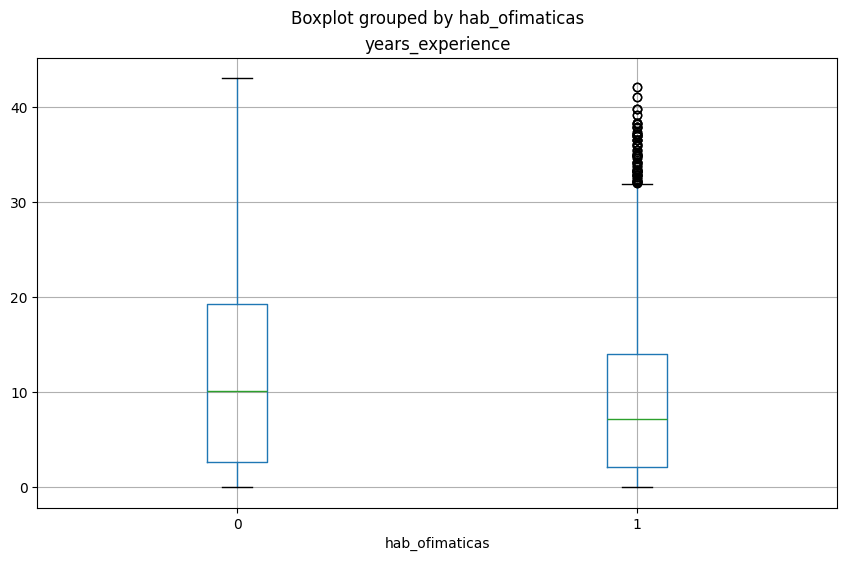

In [ ]:
# boxplot de final_salary agrupado por hab_ofimaticas
df.boxplot(column='years_experience', by='hab_ofimaticas', figsize=(10, 6))

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# import ast

# # Si los valores están como string (ej: '["MySQL", "HTML"]'), convierte a listas
# # df['skills'] = df['skills'].fillna('[]').apply(ast.literal_eval)

# # Inicializar codificador
# mlb = MultiLabelBinarizer()

# # Ajustar y transformar
# skills_ohe = pd.DataFrame(mlb.fit_transform(df['skills']), columns=mlb.classes_, index=df.index)

# # Concatenar con el DataFrame original
# df = pd.concat([df.drop(columns=['skills']), skills_ohe], axis=1)

### Company

In [108]:
!python -mspacy download es_core_news_sm # descargarnos spaCy para limpiar bien.
import spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 49.4 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [109]:
nlp = spacy.load("es_core_news_sm") # modelo de ESP.

# Función para limpiar company.
def spacy_clean(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.lower().strip())

    # dejamos solamente valores alphanumericos.
    tokens = [token.text for token in doc if token.is_alpha or token.is_digit]

    return ' '.join(tokens)

In [110]:
# Aplicamos funcion a columna

df['company_clean'] = df['company'].apply(spacy_clean)

In [111]:
# Apliquemos sentence transformers -> es lo mas eficiente
!pip install sentence_transformers

from sentence_transformers import SentenceTransformer

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [112]:
# Iniciamos modelo y vemos que tal.

model = SentenceTransformer('distiluse-base-multilingual-cased-v2') # modelo en español.

texts = df['company_clean'].astype(str).tolist() # pasamos todas las companias a una lista para crear los embeddings.

# Genera embeddings!
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 436/436 [00:17<00:00, 24.48it/s]


In [113]:
# Join al df.

# Convert to DataFrame
emb_df = pd.DataFrame(embeddings, columns=[f'company_emb_{i}' for i in range(embeddings.shape[1])])

# Merge with original df
df = pd.concat([df.reset_index(drop=True), emb_df], axis=1)

In [114]:
embeddings.shape

(13948, 512)

In [115]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,...,company_emb_502,company_emb_503,company_emb_504,company_emb_505,company_emb_506,company_emb_507,company_emb_508,company_emb_509,company_emb_510,company_emb_511
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024.0,3.966667,NaN,...,0.015122,-0.000730,-0.035202,0.000749,-0.037315,0.035799,0.026471,-0.045774,0.025747,0.053494
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010.0,23.227778,NaN,...,0.019870,0.002873,0.005963,-0.017574,-0.030331,-0.018798,0.009404,-0.046983,-0.017321,0.002883
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018.0,21.902778,NaN,...,0.028186,0.063857,0.030433,0.048586,-0.041599,-0.022883,0.000978,-0.038648,-0.020861,0.010925
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022.0,11.580556,NaN,...,0.033434,-0.009396,0.019969,-0.016142,-0.017961,-0.029515,-0.046375,0.038856,0.041139,0.016541
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013.0,15.811111,NaN,...,-0.013493,0.044532,0.031937,0.025303,-0.002073,-0.056913,0.007739,0.001898,0.017821,0.038881


### Position

In [116]:
print(df['position'].dropna().unique()[:50])  # veamos como se ve

['Técnico de Soporte' 'Consultor ERP' 'Jefe de Proyecto'
 'Jefe de Informática' 'Administrador de Bases de Datos'
 'Responsable de Desarrollo' 'Consultor Senior de Informática'
 'Gestor - Especialista de Producto' 'Otros - Informática'
 'Director de Informática' 'Técnico de Hardware'
 'Consultor Senior E-Business' 'Jefe de Proyectos de SAP '
 'Analista-Programador' 'Jefe de Procesos de Datos'
 'Consultor Senior de Tecnologías de la Información' 'Programador'
 'Community Manager' 'Jefe de Soporte' 'Operador de Explotación'
 'Administrador de Sistemas' 'Analista Funcional'
 'Director de Proyecto Informático' 'Consultor de Informática'
 'Técnico de Calidad y/o Pruebas' 'Maquetador Web' 'Técnico de Seguridad'
 'Consultor E-Business' 'Director de Área Técnica' 'Jefe de Sistemas'
 'Webmaster' 'Consultor Senior de Business Intelligence'
 'Formador Técnico' 'Operador de Sistemas y Redes' 'Técnico de Redes'
 'Analista Orgánico' 'Responsable de Diseño'
 'Consultor de Tecnologías de la Informació

In [117]:
# al parecer los datos parecen muy bien formateados. Deben de ser elegidos y no escritos probablemente.

# Limpiemos pero muy muy basico.
def spacy_clean_position(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.strip().lower())  # lowercase + remove leading/trailing spaces

    # Keep only words (no punctuation, no stopwords, etc.)
    tokens = [token.text for token in doc if token.is_alpha]

    return ' '.join(tokens)

In [118]:
df['position_clean'] = df['position'].apply(spacy_clean_position)

In [119]:
# Encode position_clean using the same multilingual model
position_texts = df['position_clean'].astype(str).tolist()

position_embeddings = model.encode(position_texts, show_progress_bar=True)

Batches: 100%|██████████| 436/436 [00:08<00:00, 49.23it/s]


In [120]:
# Join

position_emb_df = pd.DataFrame(position_embeddings, columns=[f'position_emb_{i}' for i in range(position_embeddings.shape[1])])

df = pd.concat([df.reset_index(drop=True), position_emb_df], axis=1)

In [121]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,...,position_emb_502,position_emb_503,position_emb_504,position_emb_505,position_emb_506,position_emb_507,position_emb_508,position_emb_509,position_emb_510,position_emb_511
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024.0,3.966667,NaN,...,0.005011,0.002792,-0.051752,0.007458,0.010807,-0.078142,0.012488,0.029088,0.033179,0.044062
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010.0,23.227778,NaN,...,0.034422,-0.005088,0.011865,-0.002367,-0.055878,0.003375,0.044101,-0.006726,0.004150,0.050349
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018.0,21.902778,NaN,...,0.000833,-0.034747,0.046594,0.041225,-0.017114,0.002846,0.031709,-0.008050,-0.022614,0.016501
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022.0,11.580556,NaN,...,0.010924,0.037721,0.039830,-0.005849,-0.007486,-0.028256,-0.004405,0.017053,0.005665,-0.029245
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013.0,15.811111,NaN,...,0.011097,-0.036934,0.017152,0.002890,-0.009763,0.024999,-0.034427,0.121261,0.011709,-0.046026


### Title

In [122]:
print(df['title'].dropna().unique()[:50])  # veamos como se ve

['PROFESOR DE INFORMÁTICA | Customer Service Representative | INFORMÁTICO | Programador Senior | Técnico de Hw y software'
 'Analista de Sistemas | CONSULTOR SENIOR SAP  | CONSULTORA SAP MM'
 'Gerente de Sistemas de Informacion. Dpto. Internacional | Analista Funcional - Programador | Jefe de Proyecto de Desarrollo | Jefe de Area de Transportes en el Dpto de Soluciones'
 'Responsable Helpdesk | Servicedesk Manager IT'
 'Analista | Analista-Programador | Administrador de Sistemas | DBA | Ingeniero de Sistemas'
 'Lider de Grupo'
 'Desarrollo aplicaciones Web | Administracion y Gestion de BBDD | Coordinador de Gestion de Activos'
 'Analista/Programador | Analista/Programador | Analista/Programador | Programador | Informatico | Responsable de Informática'
 'Analista Senior de sistemas microinformaticos | IT System Responsible | Tecnico de soporte'
 'Ingeniero | Consultor Senior Especialista | Jefe de Proyecto | Release Manager  | Ingeniero'
 'Gestor tecnico comercial | DOCUMENTALISTA TECNI

In [123]:
def spacy_clean_title_with_commas(text):
    if not text or pd.isna(text):
        return ''

    # Normalize weird separators before spaCy
    text = text.replace('|', ',')
    text = text.replace('/', ',')
    text = text.replace(' - ', ',')  # only where dash is used like a list separator

    doc = nlp(text.lower().strip())

    # Lemmatize and keep alpha tokens or commas
    tokens = []
    for token in doc:
        if token.is_alpha:
            tokens.append(token.lemma_)
        elif token.text == ',':
            tokens.append(',')

    return ' '.join(tokens)

In [124]:
df['title_clean'] = df['title'].apply(spacy_clean_title_with_commas)
df['title_clean']

0        profesor de informática , customer service rep...
1        analista de sistema , consultor senior sap , c...
2        gerente de sistema de informacion internaciona...
3            responsable helpdesk , servicedesk manager it
4        analista , , administrador de sistema , dba , ...
                               ...                        
13943    full stack web developer freelance , web devel...
13944    desarrollador , desarrollador web , gestor de ...
13945    project manager , project manager communicatio...
13946    sap analyst , datar science bi associate consu...
13947    desarrollador web experto en wordpress y prest...
Name: title_clean, Length: 13948, dtype: object

In [125]:
df['title_clean'].head(50)

0     profesor de informática , customer service rep...
1     analista de sistema , consultor senior sap , c...
2     gerente de sistema de informacion internaciona...
3         responsable helpdesk , servicedesk manager it
4     analista , , administrador de sistema , dba , ...
5                                        lider de grupo
6     desarrollar aplicación web , administracion y ...
7     analista , programador , analista , programado...
8     analista senior de sistema microinformatico , ...
9     ingeniero , consultor senior especialista , je...
10    gestor tecnico comercial , documentalista tecn...
11                       montador , profesor , profesor
12    analista de sistema , director de it , adjunto...
13             jefe de unidad de sistema de información
14                  consultor senior , jefe de proyecto
15    ingeniero de desarrollo , ingeniero de desarro...
16    tecnico mantenimiento hardware , tecnico mante...
17    jefe de proyecto , administrador lotus , p

In [126]:
# Again, transformers.

title_texts = df['title_clean'].tolist()
title_embeddings = model.encode(title_texts, show_progress_bar=True)

Batches: 100%|██████████| 436/436 [00:27<00:00, 15.95it/s]


In [127]:
title_emb_df = pd.DataFrame(title_embeddings, columns=[f'title_emb_{i}' for i in range(title_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), title_emb_df], axis=1)

In [128]:
df.shape

(13948, 1556)

### Skills

In [129]:
df.skills.isna().sum()

np.int64(8604)

In [130]:
print(df['skills'].dropna().sample(30).tolist())


['["Visual Basic","Microsoft SQL Server","Microsoft Windows","C","Reporting","SQL","ASP","HTML","Hardware","CSS"]', '["C","MySQL","Delphi","PHP","Wordpress","Skype","Pascal"]', '["MySQL","Hardware","ISO 9001","C"]', '["C","PrestaShop","Linux","Python"]', '["Mobile Devices","Team Management","Research","Business Development","Advertising","Strategy","Marketing","C","Telecommunications","Leadership","Marketing Strategy","Product Management","Business Strategy","Management","Sales","Negotiation","Logistics"]', '["CSS","Windows Server","OpenStack","C","FTP","Wireshark","Linux","XML","PostgreSQL","MongoDB","Python","HTML","MySQL","Puppet","Web Services","JavaScript","VirtualBox","Active Directory","NoSQL","SQL","Docker"]', '["Java","Microsoft Visio","SQL","Microsoft Project","Hardware","VMware","C","Mozilla Thunderbird","AutoCAD","Anaconda","R"]', '["Service Management","MySQL","PHP","ServiceNow","ISO 27001","Information Security","AES","Security","GDPR","Training","Scrum","Microsoft SQL Se

In [131]:
df['skills_len'] = df['skills'].dropna().apply(lambda x: len(str(x).split(',')))
print(df['skills_len'].describe())


count    5344.000000
mean       10.761789
std         7.995340
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        81.000000
Name: skills_len, dtype: float64


In [132]:
from itertools import chain

all_skills = df['skills'].dropna().apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
flat_skills = list(chain.from_iterable(all_skills))
print(f"Unique skills: {len(set(flat_skills))}")
print(sorted(set(flat_skills))[:50])  # Peek at the first 50


Unique skills: 2028
['"2g"', '"2g"]', '"3d animation"', '"3d animation"]', '"3d modeling"', '"3d printers"', '"3d printing"', '"3gpp"', '"3gpp"]', '"4nec2"', '"5g"', '"5g"]', '"ab initio"', '"abap cds"', '"abap dictionary"', '"abap objects"', '"abap oo"', '"abap oo"]', '"abap"', '"abap"]', '"ableton live"', '"acceptance testing"', '"access points"', '"access vba"', '"account management"', '"actionscript"', '"actionscript"]', '"active directory"', '"active directory"]', '"active record"', '"activecampaign"]', '"activex"', '"acunetix"', '"ada"', '"ada"]', '"adobe acrobat pro"', '"adobe acrobat pro"]', '"adobe acrobat"', '"adobe after effects"', '"adobe after effects"]', '"adobe air"', '"adobe animate"', '"adobe audition"', '"adobe audition"]', '"adobe bridge"', '"adobe captivate"', '"adobe connect"', '"adobe creative cloud"', '"adobe dreamweaver"', '"adobe dreamweaver"]']


In [133]:
df['has_skills'] = df['skills'].notna().astype(int)
print(df.groupby('has_skills')['final_salary'].describe())

             count          mean           std      min      25%      50%  \
has_skills                                                                  
0           3974.0  24905.888274  12018.661576  13000.0  18000.0  21000.0   
1           2402.0  25571.190674  15623.676306  13000.0  18000.0  21000.0   

                75%       max  
has_skills                     
0           30000.0  300000.0  
1           30000.0  300000.0  


In [134]:
# Funcion clasica para limpiar

import re

def clean_skills(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[\[\]"]', '', text)  # remove brackets and quotes
    text = re.sub(r'\s*,\s*', ', ', text)  # ensure clean spacing around commas
    return text.strip()

In [135]:
df['skills_clean'] = df['skills'].apply(clean_skills)

In [136]:
skills_texts = df['skills_clean'].tolist()
skills_embeddings = model.encode(skills_texts, show_progress_bar=True)

skills_emb_df = pd.DataFrame(skills_embeddings, columns=[f'skills_emb_{i}' for i in range(skills_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), skills_emb_df], axis=1)

Batches: 100%|██████████| 436/436 [00:22<00:00, 19.47it/s] 


In [137]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,...,skills_emb_502,skills_emb_503,skills_emb_504,skills_emb_505,skills_emb_506,skills_emb_507,skills_emb_508,skills_emb_509,skills_emb_510,skills_emb_511
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024.0,3.966667,NaN,...,0.016105,-0.003971,0.019439,0.017352,-0.038702,-0.057055,-0.019953,-0.01506,0.021243,-0.026957
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010.0,23.227778,NaN,...,0.016105,-0.003971,0.019439,0.017352,-0.038702,-0.057055,-0.019953,-0.01506,0.021243,-0.026957
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018.0,21.902778,NaN,...,0.016105,-0.003971,0.019439,0.017352,-0.038702,-0.057055,-0.019953,-0.01506,0.021243,-0.026957
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022.0,11.580556,NaN,...,0.016105,-0.003971,0.019439,0.017352,-0.038702,-0.057055,-0.019953,-0.01506,0.021243,-0.026957
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013.0,15.811111,NaN,...,0.016105,-0.003971,0.019439,0.017352,-0.038702,-0.057055,-0.019953,-0.01506,0.021243,-0.026957


### Provinces & Cities (?)

In [138]:
print("Unique provinces:", df['province'].nunique())
print("Unique cities:", df['city'].nunique())

Unique provinces: 51
Unique cities: 2510


In [139]:
print("Missing provinces:", df['province'].isna().sum())
print("Missing cities:", df['city'].isna().sum())


Missing provinces: 0
Missing cities: 810


In [140]:
print(df['province'].value_counts().head(10))
print(df['city'].value_counts().head(10))

province
Madrid        6407
Barcelona     1355
Valencia       636
Sevilla        565
Vizcaya        542
Málaga         416
Alicante       237
Guipúzcoa      220
Valladolid     218
A Coruña       214
Name: count, dtype: int64
city
Madrid        3079
Barcelona      546
madrid         283
Sevilla        255
Valencia       251
MADRID         218
Bilbao         179
Málaga         173
Valladolid     127
Zaragoza       119
Name: count, dtype: int64


In [141]:
print(df.groupby('province')['final_salary'].mean().sort_values(ascending=False).head(10))
print(df.groupby('city')['final_salary'].mean().sort_values(ascending=False).head(10))

province
Soria         28666.666667
Vizcaya       28252.032520
Madrid        27511.821975
Cuenca        27333.333333
Girona        27050.000000
Guipúzcoa     26406.593407
Barcelona     26034.375000
Álava         25960.784314
Las Palmas    25717.948718
Burgos        25217.391304
Name: final_salary, dtype: float64
city
Ermua                      300000.0
Las Matas                  174000.0
Las Palmas de G.C:         171000.0
Perales del Río, Getafe    162000.0
La Palma de Cervello       120000.0
Sol de Mallorca, Calviá    102000.0
Sant Joan Despí             80000.0
San Martín de la Vega       78000.0
SOPELA                      75000.0
Gerona                      72000.0
Name: final_salary, dtype: float64


In [142]:
df.drop(columns='city', inplace=True)

In [143]:
df['province_clean'] = df['province'].str.lower().str.strip()

province_dummies = pd.get_dummies(df['province_clean'], prefix='province').astype(int)

df = pd.concat([df, province_dummies], axis=1)

In [144]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'date_of_birth',
       'last_register', 'years_experience', 'skills', 'final_salary',
       ...
       'province_tarragona', 'province_teruel', 'province_toledo',
       'province_valencia', 'province_valladolid', 'province_vizcaya',
       'province_zamora', 'province_zaragoza', 'province_álava',
       'province_ávila'],
      dtype='object', length=2122)

**Conclusion:**

Definitivamente no vale la pena deja ciudad!

### Age

In [145]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

## Modelling Adrian

In [146]:
df.shape

(13948, 2123)

In [74]:
df_model = df[df['final_salary'].notna()].copy()

In [147]:
len(df_model)

6376

In [148]:
exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean', 'province_clean', 'register_period'
]

In [ ]:
# el target esta altamente inbalanceado, a ver si lo mejoramos:

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# Step 1: Filter labeled data
df_model = df[df['final_salary'].notna()].copy()

# Step 2: Log transform the target
y = np.log1p(df_model['final_salary'])  # log(1 + salary)

# Step 3: Define features (drop original text columns)
exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean', 'province_clean', 'register_period'
]

X = df_model.drop(columns=exclude)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: CV to benchmark
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("CV R^2 (log scale) mean:", cv_scores.mean())
print("CV R^2 std:", cv_scores.std())

# Step 6: Fit & predict
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # reverse log1p

# Step 7: Evaluate on original scale
y_test_original = np.expm1(y_test)
print("Test R^2:", r2_score(y_test_original, y_pred))
print("Test root mean squared error:", root_mean_squared_error(y_test_original, y_pred))

CV R^2 (log scale) mean: 0.3720818857035756
CV R^2 std: 0.009482541353282147
Test R^2: 0.4026921167491
Test root mean squared error: 8608.623744381233


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error
import numpy as np
import pandas as pd

# -------------------------------
# Step 1: Log-transform target
# -------------------------------
df_model = df[df['final_salary'].notna()].copy()
y = np.log1p(df_model['final_salary'])

exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean', 'province_clean', 'register_period'
]

X = df_model.drop(columns=exclude)

# -------------------------------
# Step 2: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Step 3: Scale data where needed
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 4: Define model configs
# -------------------------------
models_and_params = {
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 20],
            'min_samples_split': [2, 5]
        },
        'data': (X_train, X_test)  # Unscaled
    },
    'xgboost': {
        'model': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [6, 10],
            'learning_rate': [0.05, 0.1]
        },
        'data': (X_train, X_test)  # Unscaled
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        },
        'data': (X_train_scaled, X_test_scaled)
    },
    'mlp': {
        'model': MLPRegressor(
            hidden_layer_sizes=(256, 128),
            max_iter=600,
            early_stopping=True,
            random_state=42
        ),
        'params': {
            'alpha': [1e-4, 1e-3],
            'learning_rate_init': [0.001, 0.01]
        },
        'data': (X_train_scaled, X_test_scaled)
    }
}

# -------------------------------
# Step 5: Grid search loop
# -------------------------------
best_models = {}
mejor_rmse = float('inf')
mejor_nombre_modelo = None
mejor_modelo = None

for name, mp in models_and_params.items():
    print(f"🚀 Entrenando y buscando parámetros para: {name}")
    model = mp['model']
    param_grid = mp['params']
    X_tr, X_te = mp['data']

    grid = GridSearchCV(model, param_grid, cv=5,
                        scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(X_tr, y_train)

    y_pred_log = grid.predict(X_te)
    y_pred = np.expm1(y_pred_log)
    y_test_real = np.expm1(y_test)

    rmse_score = root_mean_squared_error(y_test_real, y_pred, squared=False)

    print(f"✅ Mejor RMSE para {name}: {rmse_score:.2f}")
    print(f"🔧 Mejores hiperparámetros: {grid.best_params_}\n")

    best_models[name] = grid.best_estimator_

    if rmse_score < mejor_rmse:
        mejor_rmse = rmse_score
        mejor_nombre_modelo = name
        mejor_modelo = grid.best_estimator_

# -------------------------------
# Step 6: Final output
# -------------------------------
print("🏆 Mejor modelo global:", mejor_nombre_modelo)
print("✅ RMSE final:", mejor_rmse)


🚀 Entrenando y buscando parámetros para: random_forest


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been us

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# -------------------------------
# Step 1: Log-transform target
# -------------------------------
df_model = df[df['final_salary'].notna()].copy()
y = np.log1p(df_model['final_salary'])

exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean', 'province_clean', 'register_period'
]

X = df_model.drop(columns=exclude)

# -------------------------------
# Step 2: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Step 3: Scale data where needed
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 4: Define model configs
# -------------------------------
models_and_params = {
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 20],
            'min_samples_split': [2, 5]
        },
        'data': (X_train, X_test)  # Unscaled
    },
    'xgboost': {
        'model': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [6, 10],
            'learning_rate': [0.05, 0.1]
        },
        'data': (X_train, X_test)  # Unscaled
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        },
        'data': (X_train_scaled, X_test_scaled)
    },
    'mlp': {
        'model': MLPRegressor(
            hidden_layer_sizes=(256, 128),
            max_iter=600,
            early_stopping=True,
            random_state=42
        ),
        'params': {
            'alpha': [1e-4, 1e-3],
            'learning_rate_init': [0.001, 0.01]
        },
        'data': (X_train_scaled, X_test_scaled)
    }
}

# -------------------------------
# Step 5: Grid search loop
# -------------------------------
best_models = {}
mejor_rmse = float('inf')
mejor_nombre_modelo = None
mejor_modelo = None

for name, mp in models_and_params.items():
    print(f"🚀 Entrenando y buscando parámetros para: {name}")
    model = mp['model']
    param_grid = mp['params']
    X_tr, X_te = mp['data']

    grid = GridSearchCV(model, param_grid, cv=5,
                        scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(X_tr, y_train)

    y_pred_log = grid.predict(X_te)
    y_pred = np.expm1(y_pred_log)
    y_test_real = np.expm1(y_test)

    rmse_score = mean_squared_error(y_test_real, y_pred, squared=False)

    print(f"✅ Mejor RMSE para {name}: {rmse_score:.2f}")
    print(f"🔧 Mejores hiperparámetros: {grid.best_params_}\n")

    best_models[name] = grid.best_estimator_

    if rmse_score < mejor_rmse:
        mejor_rmse = rmse_score
        mejor_nombre_modelo = name
        mejor_modelo = grid.best_estimator_

# -------------------------------
# Step 6: Final output
# -------------------------------
print("🏆 Mejor modelo global:", mejor_nombre_modelo)
print("✅ RMSE final:", mejor_rmse)


### Neural network?

In [88]:
nan_counts = pd.DataFrame(X_test, columns=X.columns).isna().sum()
print(nan_counts[nan_counts > 0])


skills_len    799
dtype: int64


## Exportar el csv

In [ ]:
df.to_csv("df_procesado_v1.csv", index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27697 entries, 0 to 27696
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   uuid                            27697 non-null  object  
 1   company                         27301 non-null  object  
 2   title                           27697 non-null  object  
 3   position                        27697 non-null  object  
 4   province                        27697 non-null  object  
 5   date_of_birth                   27697 non-null  object  
 6   last_register                   12693 non-null  float64 
 7   years_experience                27697 non-null  float64 
 8   skills                          27697 non-null  object  
 9   final_salary                    27697 non-null  float64 
 10  register_period                 12693 non-null  category
 11  comunidad_andalucia             27697 non-null  bool    
 12  comunidad_cataluna

In [ ]:
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

In [ ]:
df.head()

,uuid,company,title,position,province,date_of_birth,last_register,years_experience,skills,final_salary,register_period,comunidad_andalucia,comunidad_cataluna,comunidad_comunidad_valenciana,comunidad_comunidad_de_madrid,comunidad_otros,position_texto,position_palabras,comunidad_grupo,hab_ofimaticas
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,1974-08-28T00:00:00.000Z,2024.0,3.966667,[],18000.0,2021–2025,0,0,0,1,0,tecnico soporte,tecnico,de_madrid,0
1,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,1974-08-28T00:00:00.000Z,2024.0,3.966667,[],18000.0,2021–2025,0,0,0,1,0,tecnico soporte,soporte,de_madrid,0
2,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,1974-03-24T00:00:00.000Z,2010.0,23.227778,[],21000.0,2006–2010,0,0,0,0,1,consultor erp,consultor,otros,0
3,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,1974-03-24T00:00:00.000Z,2010.0,23.227778,[],21000.0,2006–2010,0,0,0,0,1,consultor erp,erp,otros,0
4,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,1966-10-08T00:00:00.000Z,2018.0,21.902778,[],42000.0,2016–2020,0,0,0,1,0,jefe proyecto,jefe,de_madrid,0


In [ ]:
# df_model = df.drop(['uuid', 'company', 'title', 'position', 'province', 'date_of_birth', 'last_register', 'skills', 'register_period'], axis=1).copy()

In [ ]:
df_model = df.select_dtypes(include=['number'])
df_model = df_model.drop(['last_register'], axis=1)

In [ ]:
df_model.describe()

,years_experience,final_salary,comunidad_andalucia,comunidad_cataluna,comunidad_comunidad_valenciana,comunidad_comunidad_de_madrid,comunidad_otros,hab_ofimaticas
count,27697.000000,27697.000000,27697.000000,27697.000000,27697.000000,27697.000000,27697.000000,27697.000000
mean,10.698699,25984.337052,0.110590,0.108351,0.065603,0.473084,0.242373,0.379463
std,9.074934,10062.748823,0.313629,0.310829,0.247591,0.499284,0.428526,0.485262
min,0.000000,13000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.366667,20440.993789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.602778,24000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.652778,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,43.016667,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27697 entries, 0 to 27696
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_experience                27697 non-null  float64
 1   final_salary                    27697 non-null  float64
 2   comunidad_andalucia             27697 non-null  int64  
 3   comunidad_cataluna              27697 non-null  int64  
 4   comunidad_comunidad_valenciana  27697 non-null  int64  
 5   comunidad_comunidad_de_madrid   27697 non-null  int64  
 6   comunidad_otros                 27697 non-null  int64  
 7   hab_ofimaticas                  27697 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.7 MB


# Modelado


In [ ]:
# Matriz de correlación de Pearson entre variables numéricas
corr_matrix = df_model.corr(numeric_only=True, method='pearson')

# Eliminar duplicados y diagonal
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix = corr_matrix.mask(tril)

# Reorganizar en formato tidy
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})

# Ordenar por valor absoluto de la correlación
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostrar
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,comunidad_comunidad_de_madrid,comunidad_otros,-0.535935,0.535935
1,comunidad_andalucia,comunidad_comunidad_de_madrid,-0.334121,0.334121
2,comunidad_cataluna,comunidad_comunidad_de_madrid,-0.330307,0.330307
3,comunidad_comunidad_valenciana,comunidad_comunidad_de_madrid,-0.251069,0.251069
4,final_salary,comunidad_comunidad_de_madrid,0.226779,0.226779
5,years_experience,final_salary,0.212102,0.212102
6,comunidad_andalucia,comunidad_otros,-0.199444,0.199444
7,comunidad_cataluna,comunidad_otros,-0.197167,0.197167
8,final_salary,comunidad_andalucia,-0.158516,0.158516
9,comunidad_comunidad_valenciana,comunidad_otros,-0.149868,0.149868


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27697 entries, 0 to 27696
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_experience                27697 non-null  float64
 1   final_salary                    27697 non-null  float64
 2   comunidad_andalucia             27697 non-null  int64  
 3   comunidad_cataluna              27697 non-null  int64  
 4   comunidad_comunidad_valenciana  27697 non-null  int64  
 5   comunidad_comunidad_de_madrid   27697 non-null  int64  
 6   comunidad_otros                 27697 non-null  int64  
 7   hab_ofimaticas                  27697 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.7 MB


In [ ]:
df_numericas = df_model.select_dtypes(include=['number'])

In [ ]:
X = df_model.drop(columns=['final_salary'])
y = df_model['final_salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Añadir constante para el intercepto
X_train = sm.add_constant(X_train, prepend=True).rename(columns={'const': 'intercept'})

# Ajustar modelo OLS
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo_res = modelo.fit()

# Resultados
print(modelo_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     400.2
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        20:34:36   Log-Likelihood:            -2.3499e+05
No. Observations:               22157   AIC:                         4.700e+05
Df Residuals:                   22150   BIC:                         4.701e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
intercept   

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Add intercept to both train and test sets FIRST
X_train = sm.add_constant(X_train, prepend=True).rename(columns={'const': 'intercept'})
X_test = sm.add_constant(X_test, prepend=True).rename(columns={'const': 'intercept'})


# Escalado ahora (ambos sets tienen el intercepto)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame (opcional pero útil para sm.add_constant)
# Las columnas ya tienen el intercepto, no necesitamos add_constant de nuevo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

models_and_params = {
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'xgboost': {
        'model': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1]
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    }
}


In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # Import mean_squared_error
import numpy as np # Import numpy

# Split data (ensure y is 1D for sklearn, 2D for statsmodels if needed later)
# For sklearn models, a 1D y is standard.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y, # Keep y as 1D Series for sklearn models
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Data for models that do NOT require scaling (e.g., RandomForest, XGBoost)
# These should NOT have a manually added intercept for sklearn models
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

# Data for models that DO require scaling (e.g., Ridge)
# Do NOT add intercept manually here. Sklearn Ridge handles it.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled) # Fit on unscaled train
X_test_scaled = scaler.transform(X_test_unscaled)       # Transform unscaled test

# Convert scaled numpy arrays back to DataFrames, keeping original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns, index=X_train_unscaled.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_unscaled.columns, index=X_test_unscaled.index)


# --- OLS Model (Optional - only if you still need the summary) ---
# If you need the OLS summary with intercept, add it *only* for that specific call
# Ensure y_train is 2D if OLS requires it
# OLS_X_train = sm.add_constant(X_train.copy(), prepend=True).rename(columns={'const': 'intercept'})
# modelo = sm.OLS(endog=y_train.values.reshape(-1,1), exog=OLS_X_train) # Use 2D y
# modelo_res = modelo.fit()
# print(modelo_res.summary())
# --- End OLS Model ---


# --- Model Training Loop ---
best_models = {}

models_and_params = {
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        },
        'data': (X_train_unscaled, X_test_unscaled) # Specify unscaled data
    },
    'xgboost': {
        'model': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'), # corrected objective
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1]
        },
        'data': (X_train_unscaled, X_test_unscaled) # Specify unscaled data
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        },
        'data': (X_train_scaled, X_test_scaled) # Specify scaled data
    }
}


# --- Almacenar el mejor modelo global ---
mejor_nombre_modelo = None
mejor_rmse = float('inf')  # inicializamos con un valor muy grande
mejor_modelo = None

for name, mp in models_and_params.items():
    print(f"Entrenando y buscando parámetros para: {name}")
    model = mp['model']
    param_grid = mp['params']
    X_train_data, X_test_data = mp['data'] # Get the correct data split

    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

    grid.fit(X_train_data, y_train)
    y_pred = grid.predict(X_test_data)

    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Mejor RMSE para {name}: {rmse_score:.2f}")
    print(f"Mejores hiperparámetros: {grid.best_params_}\n")

    # Guardar modelo actual
    best_models[name] = grid.best_estimator_

    # Comparar con el mejor actual
    if rmse_score < mejor_rmse:
        mejor_rmse = rmse_score
        mejor_modelo = grid.best_estimator_
        mejor_nombre_modelo = name

# Mostrar el mejor modelo final
print(f"✅ Mejor modelo global: {mejor_nombre_modelo}")
print(f"✅ RMSE: {mejor_rmse:.2f}")


Entrenando y buscando parámetros para: random_forest
Mejor RMSE para random_forest: 7185.81
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Entrenando y buscando parámetros para: xgboost
Mejor RMSE para xgboost: 8134.50
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Entrenando y buscando parámetros para: ridge
Mejor RMSE para ridge: 8443.43
Mejores hiperparámetros: {'alpha': 10.0}

✅ Mejor modelo global: random_forest
✅ RMSE: 7185.81


In [ ]:
# Keep a copy of the original DataFrame or just the uuid column
# Assuming 'df' is the DataFrame before creating 'df_model'
df_original_with_uuid = df.copy()

df_model = df.select_dtypes(include=['number'])
df_model = df_model.drop(['last_register'], axis=1)

X = df_model.drop(columns=['final_salary'])
y = df_model['final_salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Data for models that do NOT require scaling
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

# Data for models that DO require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns, index=X_train_unscaled.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_unscaled.columns, index=X_test_unscaled.index)

best_models = {}

models_and_params = {
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        },
        'data': (X_train_unscaled, X_test_unscaled)
    },
    'xgboost': {
        'model': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1]
        },
        'data': (X_train_unscaled, X_test_unscaled)
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        },
        'data': (X_train_scaled, X_test_scaled)
    }
}

mejor_nombre_modelo = None
mejor_rmse = float('inf')
mejor_modelo = None

for name, mp in models_and_params.items():
    print(f"Entrenando y buscando parámetros para: {name}")
    model = mp['model']
    param_grid = mp['params']
    X_train_data, X_test_data = mp['data']

    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

    grid.fit(X_train_data, y_train)
    y_pred = grid.predict(X_test_data)

    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Mejor RMSE para {name}: {rmse_score:.2f}")
    print(f"Mejores hiperparámetros: {grid.best_params_}\n")

    best_models[name] = grid.best_estimator_

    if rmse_score < mejor_rmse:
        mejor_rmse = rmse_score
        mejor_modelo = grid.best_estimator_
        mejor_nombre_modelo = name

print(f"✅ Mejor modelo global: {mejor_nombre_modelo}")
print(f"✅ RMSE: {mejor_rmse:.2f}")

# Obtener los uuid del conjunto de test usando el DataFrame original
# Use the index from the X_test split to select uuids from the original df
uuid_test = df_original_with_uuid.loc[X_test.index, 'uuid']

# Predecir usando el mejor modelo
if mejor_nombre_modelo == 'ridge':
    X_input = X_test_scaled
else:
    X_input = X_test_unscaled

# Hacer predicciones
salario_predicho = mejor_modelo.predict(X_input)


Entrenando y buscando parámetros para: random_forest
Mejor RMSE para random_forest: 7185.81
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Entrenando y buscando parámetros para: xgboost
Mejor RMSE para xgboost: 8134.50
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Entrenando y buscando parámetros para: ridge
Mejor RMSE para ridge: 8443.43
Mejores hiperparámetros: {'alpha': 10.0}

✅ Mejor modelo global: random_forest
✅ RMSE: 7185.81
📁 Archivo 'predicciones_salario.csv' generado correctamente.


In [ ]:
# Crear DataFrame con uuid y predicción
df_resultado = pd.DataFrame({
    'uuid': uuid_test.values,
    'real_salary': salario_predicho
})

# Guardar a CSV
df_resultado.to_csv('predicciones_salario.csv', index=False)
print("📁 Archivo 'predicciones_salario.csv' generado correctamente.")

📁 Archivo 'predicciones_salario.csv' generado correctamente.


In [ ]:
# Verificar si hay UUIDs duplicados
duplicados = df_resultado['uuid'].duplicated()

# Mostrar cuántos hay y cuáles son
num_duplicados = duplicados.sum()
print(f"🔎 Número de UUIDs duplicados: {num_duplicados}")

if num_duplicados > 0:
    print("📋 UUIDs duplicados encontrados:")
    print(df_resultado[duplicados])


🔎 Número de UUIDs duplicados: 665
📋 UUIDs duplicados encontrados:
                                      uuid   real_salary
221   c8203c90-9a1f-4570-a167-47ebc4e32786  21309.958835
302   420dad27-3d02-4cbb-9a8f-63c853a347b6  32025.379168
363   961e6eb7-7fcf-4d24-8de5-d9240d9da338  26566.210657
421   b9d8cef1-c4a0-4e43-8071-297069e76b2c  30676.123081
543   88464234-5d07-40b7-bc18-427a705959c3  49290.555184
...                                    ...           ...
5503  c69dee38-4e08-4112-9cd7-1ec56477f517  23000.823100
5516  f76a86e6-3aa9-4003-bb83-a7ca167962c1  21569.401893
5522  1268718a-1b51-41ce-a0c2-94fbb3bf9d6b  30194.417245
5531  d83357c0-c351-4144-b332-5c08d19b8c7a  27882.004299
5536  b39cc529-fa35-474b-be75-6295990b480c  21201.982495

[665 rows x 2 columns]
